In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [81]:
df.isnull().sum()
## to delete the null values

df.dropna(inplace=True)
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [82]:
## duplicates
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [83]:
##cat col   --- num col
cat_col = df.select_dtypes(include='object')
cat_col.head()


,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [84]:
#feature selection
cat_col = df.drop(["bike_name", "city"],axis=1)
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [85]:
num_col= df.select_dtypes(exclude = 'object')
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [86]:
# cat --> num
## label encoding 
## one hot encoding


In [87]:
## one hot encoding

pd.get_dummies(cat_col).head()

,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000.0,17654.0,3.0,110.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,119900.0,11000.0,4.0,350.0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,600000.0,110.0,8.0,675.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,65000.0,16329.0,4.0,180.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,80000.0,10000.0,3.0,150.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [88]:
## one hot encoding

pd.get_dummies(cat_col).astype(int).head()

,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,35000,17654,3,110,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900,11000,4,350,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000,110,8,675,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000,16329,4,180,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000,10000,3,150,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
## label encoding  --> ordinal encoding
cat_col['owner'].value_counts

<bound method IndexOpsMixin.value_counts of 0       First Owner
1       First Owner
2       First Owner
3       First Owner
4       First Owner
           ...     
9362    First Owner
9369    First Owner
9370    First Owner
9371    First Owner
9372    First Owner
Name: owner, Length: 7324, dtype: object>

In [90]:
dt = {"First Owner":1,
      "Second Owner":2,
      "Third Owner":3,
      "Fourth Owner Or More":4}

In [91]:
cat_col["owner"] = cat_col["owner"].map(dt)

In [92]:
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,TVS
1,119900.0,11000.0,1,4.0,350.0,Royal Enfield
2,600000.0,110.0,1,8.0,675.0,Triumph
3,65000.0,16329.0,1,4.0,180.0,TVS
4,80000.0,10000.0,1,3.0,150.0,Yamaha


In [93]:
final_df={i: key for key , i in enumerate(list(cat_col['brand'].unique()))}

In [94]:
cat_col['brand'] = cat_col['brand'].map(final_df)

In [95]:
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,0
1,119900.0,11000.0,1,4.0,350.0,1
2,600000.0,110.0,1,8.0,675.0,2
3,65000.0,16329.0,1,4.0,180.0,0
4,80000.0,10000.0,1,3.0,150.0,3


In [96]:
final_df = pd.concat([cat_col, num_col],axis=1)
cat_col.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3.0,110.0,0
1,119900.0,11000.0,1,4.0,350.0,1
2,600000.0,110.0,1,8.0,675.0,2
3,65000.0,16329.0,1,4.0,180.0,0
4,80000.0,10000.0,1,3.0,150.0,3


In [97]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
matrix = final_df.corr()
matrix

,price,kms_driven,owner,age,power,brand,price,kms_driven,age,power
price,1.000000,-0.199951,-0.005188,-0.248752,0.807641,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,-0.199951,1.000000,0.062612,0.367518,-0.168295,-0.036161,-0.199951,1.000000,0.367518,-0.168295
owner,-0.005188,0.062612,1.000000,0.203151,0.043746,0.005844,-0.005188,0.062612,0.203151,0.043746
age,-0.248752,0.367518,0.203151,1.000000,-0.164211,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.807641,-0.168295,0.043746,-0.164211,1.000000,0.068647,0.807641,-0.168295,-0.164211,1.000000
brand,0.288409,-0.036161,0.005844,-0.030263,0.068647,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,1.000000,-0.199951,-0.005188,-0.248752,0.807641,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,-0.199951,1.000000,0.062612,0.367518,-0.168295,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,-0.248752,0.367518,0.203151,1.000000,-0.164211,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.807641,-0.168295,0.043746,-0.164211,1.000000,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

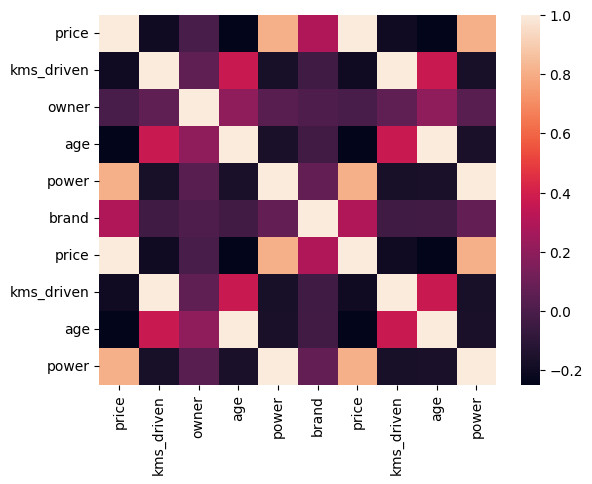

In [99]:
sns.heatmap(matrix)

<Axes: >

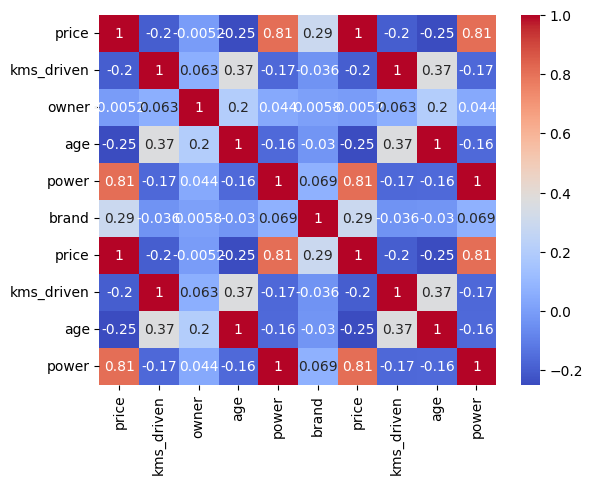

In [100]:
sns.heatmap(matrix, annot=True, cmap='coolwarm')

In [101]:
## divide the data into independent and dependent features
x = final_df.drop('price',axis=1)
y = final_df['price']

In [102]:
## training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size=0.2, 
                                                    random_state= 42)

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
lr.score(x_train, y_train)


0.705382660567176

In [105]:
lr.score(x_test, y_test)

0.758690086938602